In [1]:
import cdflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from utc_jday_conv import utc, utc_diff, jd
from kamodo_ccmc.flythrough.utils import ConvertCoord
from sgp4.api import Satrec, jday
from datetime import datetime, timezone
import re
from pylab import rcParams

r_e = 6371.

In [2]:
nat = cdflib.CDF('./natural/C2_CP_WHI_NATURAL__20111001_000000_20111101_000000_V150117.cdf')

In [12]:
nat.cdf_info()

CDFInfo(CDF=WindowsPath('C:/Users/jess/OneDrive - University of Cambridge/QMUL/WHISPER/natural/C2_CP_WHI_NATURAL__20111001_000000_20111101_000000_V150117.cdf'), Version='3.7.0', Encoding=1, Majority='Row_major', rVariables=[], zVariables=['time_tags__C2_CP_WHI_NATURAL', 'Delta__C2_CP_WHI_NATURAL', 'fft_size__C2_CP_WHI_NATURAL', 'Receiving_Antenna__C2_CP_WHI_NATURAL', 'Electric_Spectral_Power_Density__C2_CP_WHI_NATURAL', 'Spectral_Frequencies__C2_CP_WHI_NATURAL', 'Overflow_Code__C2_CP_WHI_NATURAL', 'Average_Number__C2_CP_WHI_NATURAL', 'Gain_Change_Number__C2_CP_WHI_NATURAL', 'Mantissa__C2_CP_WHI_NATURAL', 'Exponent__C2_CP_WHI_NATURAL'], Attributes=[{'METADATA_VERSION': 'Global'}, {'MISSION': 'Global'}, {'MISSION_TIME_SPAN': 'Global'}, {'MISSION_AGENCY': 'Global'}, {'MISSION_DESCRIPTION': 'Global'}, {'MISSION_KEY_PERSONNEL': 'Global'}, {'MISSION_REFERENCES': 'Global'}, {'MISSION_REGION': 'Global'}, {'MISSION_CAVEATS': 'Global'}, {'OBSERVATORY': 'Global'}, {'OBSERVATORY_CAVEATS': 'Global'

In [3]:
espd = nat['Electric_Spectral_Power_Density__C2_CP_WHI_NATURAL']
time = nat['time_tags__C2_CP_WHI_NATURAL']
freq = nat['Spectral_Frequencies__C2_CP_WHI_NATURAL']
dt = cdflib.cdfepoch.to_datetime(time)

In [5]:
# nat.varinq('Electric_Spectral_Power_Density__C2_CP_WHI_NATURAL')
# nat.varinq('Spectral_Frequencies__C2_CP_WHI_NATURAL')
print(espd.shape)
print(nat.attget('UNITS',4).Data)


(1335805, 512)
V^2 m^-2 Hz^-1


In [6]:
i = 200
x = dt[1150000:1250000]
y = freq[:i]
z = np.transpose(espd[1150000:1250000,:i])

(5.0, 10.0)

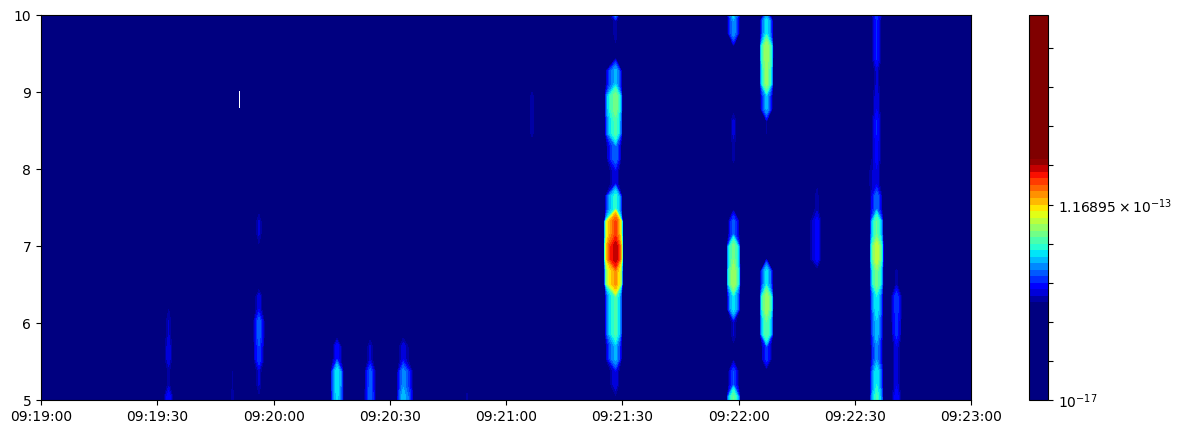

In [13]:
rcParams['figure.figsize'] = 15, 5
plt.contourf(x,y,z, levels=np.logspace(-17,-9,num=60,base=10.0), norm = colors.LogNorm(vmin = 1e-15, vmax = 1e-12), cmap = 'jet')
plt.colorbar()
plt.xlim(datetime(2011,10,28,9,19),datetime(2011,10,28,9,23))
plt.ylim(5,10)

In [54]:
ed = cdflib.CDF('./electron-density/C2_CP_WHI_ELECTRON_DENSITY__20111001_000000_20111101_000000_V161215.cdf')
ed.cdf_info()

CDFInfo(CDF=WindowsPath('C:/Users/jess/OneDrive - University of Cambridge/QMUL/WHISPER/electron-density/C2_CP_WHI_ELECTRON_DENSITY__20111001_000000_20111101_000000_V161215.cdf'), Version='3.7.0', Encoding=1, Majority='Row_major', rVariables=[], zVariables=['time_tags__C2_CP_WHI_ELECTRON_DENSITY', 'Delta_Time__C2_CP_WHI_ELECTRON_DENSITY', 'Spectrum_Type__C2_CP_WHI_ELECTRON_DENSITY', 'Computation_Method__C2_CP_WHI_ELECTRON_DENSITY', 'External_Data__C2_CP_WHI_ELECTRON_DENSITY', 'Human_Validation__C2_CP_WHI_ELECTRON_DENSITY', 'Electron_Density__C2_CP_WHI_ELECTRON_DENSITY', 'Uncertainty__C2_CP_WHI_ELECTRON_DENSITY', 'Contrast__C2_CP_WHI_ELECTRON_DENSITY', 'Quality__C2_CP_WHI_ELECTRON_DENSITY'], Attributes=[{'METADATA_VERSION': 'Global'}, {'MISSION': 'Global'}, {'MISSION_TIME_SPAN': 'Global'}, {'MISSION_AGENCY': 'Global'}, {'MISSION_DESCRIPTION': 'Global'}, {'MISSION_KEY_PERSONNEL': 'Global'}, {'MISSION_REFERENCES': 'Global'}, {'MISSION_REGION': 'Global'}, {'MISSION_CAVEATS': 'Global'}, {'OB

2011-10-01T04:36:13.142000 9.423535


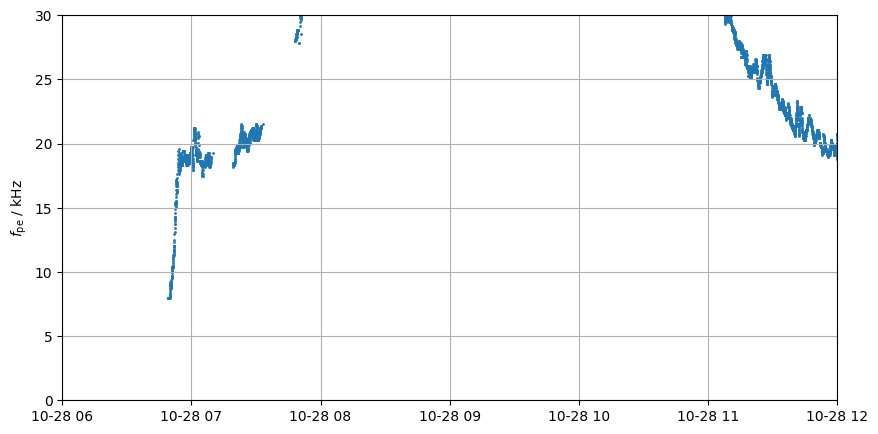

In [82]:
# ed['Electron_Density__C2_CP_WHI_ELECTRON_DENSITY'].shape
# ed['time_tags__C2_CP_WHI_ELECTRON_DENSITY'].shape
# for i in range(10):
#     print(ed.attget('UNITS',i))
# print(ed.varinq('Electron_Density__C2_CP_WHI_ELECTRON_DENSITY'))

t = cdflib.cdfepoch.to_datetime(ed['time_tags__C2_CP_WHI_ELECTRON_DENSITY'])
e = ed['Electron_Density__C2_CP_WHI_ELECTRON_DENSITY']
f_pe = 8.97*e**0.5

i = 10000
j = 20000
print(t[0],e[0])

rcParams['figure.figsize'] = 10, 5
# plt.scatter(t[i:j], e[i:j],s=1)
plt.scatter(t, f_pe, s=1)
plt.ylabel('$f_\mathrm{pe}$ / kHz')
plt.xlim(datetime(2011,10,28,6),datetime(2011,10,28,12))
plt.ylim(0,30)
plt.grid()

### Cell graveyard

In [2]:
wfe = cdflib.CDF('./waveform-energy/C2_CP_WHI_WAVE_FORM_ENERGY__20110901_000000_20111001_000000_V150124.cdf')
u9 = np.load('./whi_t_1109.npy')

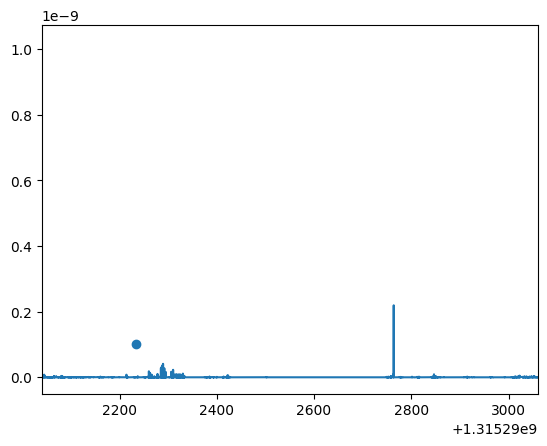

In [24]:
plt.plot(u9,wfe['Electric_Wave_Form_Power_Density__C2_CP_WHI_WAVE_FORM_ENERGY'])
# plt.yscale('log')
plt.xlim(1315292100-60,1315293000+60)
plt.scatter(1315292234,0.1e-9)